In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [25]:
PATH = "girls_msk_data.csv"
dataset = pd.read_csv(PATH)

In [26]:
dataset.head()

,age,name,breasts_size,weight,height,sex_tags,district_of_work,price_per_hour,price_per_2h,price_per_night
0,21,Дарья,3,55,180,"['Индивидуалка', 'МБР', 'Эскорт', 'Целуюсь', '...","['Москва', 'Хорошёвский']",15000.0,30000.0,75000.0
1,19,Эмма,2,63,168,"['Диспетчер', 'МБР', 'Эскорт', 'Целуюсь', 'Апа...","['Москва', 'Отрадное']",11000.0,22000.0,65000.0
2,23,Ника,3,75,185,"['Индивидуалка', 'МБР', 'Целуюсь', 'GFE', 'Выс...","['Москва', 'Тёплый Стан']",8000.0,16000.0,45000.0
3,18,Милана,1,45,163,"['Индивидуалка', 'МБР', 'Целуюсь', 'Апартамент...","['Москва', 'Савёловский']",10000.0,20000.0,60000.0
4,21,Alina vanilla,3,52,170,"['Индивидуалка', 'Анальный секс', 'МБР', 'Эско...","['Москва', 'Пресненский']",20000.0,40000.0,120000.0


In [27]:
dataset = dataset[["age", "breasts_size", "breasts_size", "weight", "height", "price_per_hour"]]

In [28]:
dataset.head()

,age,breasts_size,breasts_size,weight,height,price_per_hour
0,21,3,3,55,180,15000.0
1,19,2,2,63,168,11000.0
2,23,3,3,75,185,8000.0
3,18,1,1,45,163,10000.0
4,21,3,3,52,170,20000.0


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1262 non-null   int64  
 1   breasts_size    1262 non-null   int64  
 2   breasts_size    1262 non-null   int64  
 3   weight          1262 non-null   int64  
 4   height          1262 non-null   int64  
 5   price_per_hour  1262 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 59.3 KB


Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

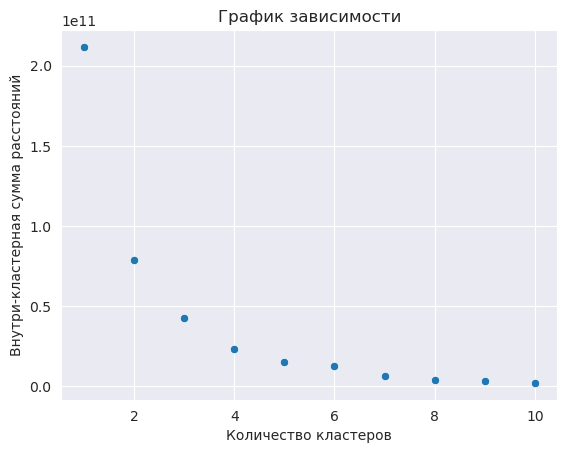

In [ ]:
inertia = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init= 'k-means++')
    k_means.fit(dataset)
    inertia.append(k_means.inertia_)

sns.set_style('darkgrid')

sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

In [31]:
CLUSTERS = 4

model = KMeans(n_clusters=CLUSTERS, random_state=0)
model.fit(dataset)

clusters = pd.DataFrame(
    columns=dataset.columns,
    data=model.cluster_centers_
)
clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters

,age,breasts_size,breasts_size,weight,height,price_per_hour,Amount
0,25.071429,2.380562,2.380562,54.642857,167.275176,13553.278689,854
1,23.927536,2.695652,2.695652,53.533333,168.284058,30985.507246,345
2,20.857143,2.190476,2.190476,49.428571,168.285714,77142.857143,21
3,22.809524,2.714286,2.714286,50.619048,170.523810,49523.809524,42
